# Preparation : Decoration

In [187]:
import time
def func_l(n):
    for i in range(n):
        print (n)

def call_time(func_l, arg):
    start = time.time()
    func_l(arg)
    print('used time:{}'.format(time.time()-start))

In [188]:
call_time(func_l, 10)

10
10
10
10
10
10
10
10
10
10
used time:0.0


In [202]:
from collections import defaultdict

from functools import wraps

function_called_time = defaultdict(int)

def get_call_time(func):
    @wraps(func)  #keep the informatioin inside func
    def _inner(arg):
        function_called_time[func.__name__] +=1
        result = func(arg)
        print('function called time is:{}'.format(function_called_time[func.__name__]))
        return result
    return _inner
        

In [203]:
func_l = get_call_time(func_l)
func_l(10)

10
10
10
10
10
10
10
10
10
10
function called time is:1
function called time is:1


In [204]:
@get_call_time
def func_l(n):
    """
    @param n: is the number of customers
    @return int: the customers value point
    """
    for i in range(n):
        print (n)

In [200]:
func_l(10)

10
10
10
10
10
10
10
10
10
10
function called time is:4


In [201]:
help(func_l)  #without @wrap

Help on function _inner in module __main__:

_inner(arg)



In [205]:
help(func_l)  #with @wrap

Help on function func_l in module __main__:

func_l(n)
    @param n: is the number of customers
    @return int: the customers value point



# Dynamic Programming for rob cutting

Dynamic programming solves problems by combining the solutions to subproblems. A dynamic-programming algorithm solves each subsubproblem just once and then saves its answer in a table, thereby avoiding the work of recomputing the answer every time it solves each subsubproblem.

The rod-cutting problem is the following. Given a rod of length n inches and a
table of prices $Pi$  for $i= 1,2.....n$, determine the maximum revenue rn  obtain-able by cutting up the rod and selling the pieces. Note that if the price pn for a rod of length n is large enough, an optimal solution may require no cutting at all.<p>
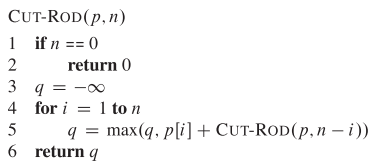

In [4]:
from collections import defaultdict

original_price = [1,5,8,9,10,17,17,20,24,30]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p

In [5]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

In [42]:
from functools import wraps
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        #print(cache)
        return result
    return _wrap

solution = {}   #定义在函数外，递归函数每次调用本身时，其值会累计

@memo
def r(n):
    max_price, split_point = max(
        [(price[n],0)] + [(r(i) + r(n-i),i) for i in range(1,n)], key = lambda x:x[0]
    )
    solution[n] = (split_point, n-split_point)
    return max_price

In [52]:
r(25)

73

In [53]:
solution[25]

(2, 23)

In [77]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23)}

In [78]:
def not_cut(split): return split==0

def parse_solution(n,solution):
    point_list = []
    p1,p2 = solution[n]
    
    if not_cut(p1): return [p2]
    
    return parse_solution(p1, solution) + parse_solution(p2, solution)
    

In [79]:
parse_solution(25, solution)

[2, 3, 10, 10]

# Dynamic Programming for minimum Edit Distance

The minimum edit distance between two strings is the minimum number of editing oprations: <p>
*-Insertion* <p>
*-Deletion*  <p>
*-Substitution* <p>
needed to transform one into another.<p>
The cost of insertion and deletion is 1, substitution is 2.<p> 
    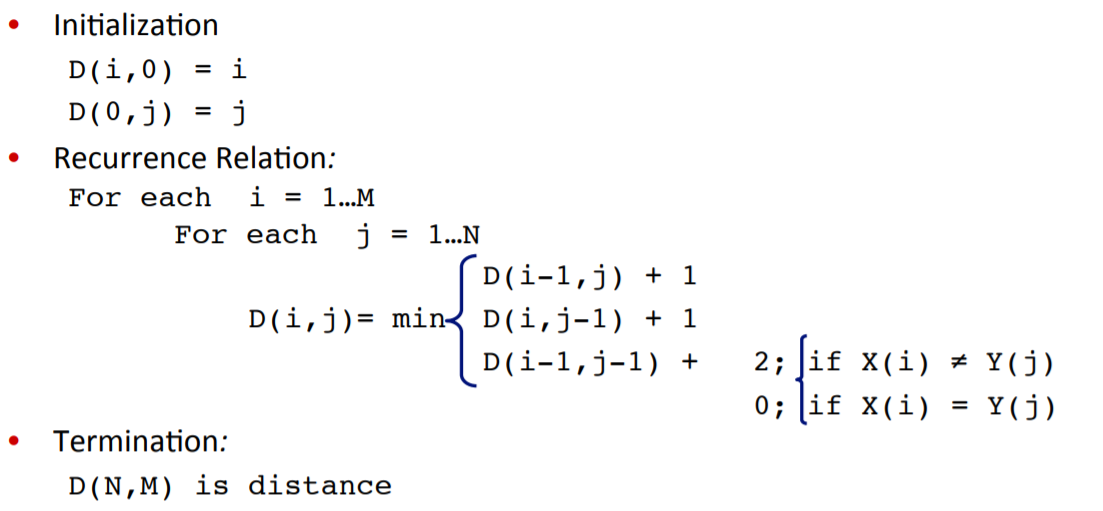


In [173]:
from functools import lru_cache

solution ={}

@lru_cache(maxsize = 2**10)
def edit_distance(string1,string2):
    if len(string1)==0: return len(string2)
    if len(string2)==0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    DEL = (edit_distance(string1[:-1],string2) + 1, 'DEL {}'.format(tail_s1))
    INS = (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2))
    
    if tail_s1 == tail_s2: 
        SUB = (edit_distance(string1[:-1], string2[:-1]), 'None')
    else:
        SUB = (edit_distance(string1[:-1], string2[:-1]) + 2, 'SUB {}=>{}'.format(tail_s1, tail_s2))
    
    distance, operation = min( SUB, DEL, INS, key = lambda x: x[0]) # 由于SUB可由ADD和DEL组合而成，当SUB至于最后一位时，它将被前两者的组合代替
    #print(distance, operation)
    
    solution[(string1, string2)] = operation
    
    return distance

In [176]:
edit_distance('beijing','biejie')

5

In [177]:
solution

{('b', 'b'): 'None',
 ('b', 'bi'): 'ADD i',
 ('b', 'bie'): 'ADD e',
 ('b', 'biej'): 'ADD j',
 ('b', 'bieji'): 'ADD i',
 ('b', 'biejie'): 'ADD e',
 ('be', 'b'): 'DEL e',
 ('be', 'bi'): 'SUB e=>i',
 ('be', 'bie'): 'None',
 ('be', 'biej'): 'ADD j',
 ('be', 'bieji'): 'ADD i',
 ('be', 'biejie'): 'None',
 ('bei', 'b'): 'DEL i',
 ('bei', 'bi'): 'None',
 ('bei', 'bie'): 'DEL i',
 ('bei', 'biej'): 'SUB i=>j',
 ('bei', 'bieji'): 'None',
 ('bei', 'biejie'): 'ADD e',
 ('beij', 'b'): 'DEL j',
 ('beij', 'bi'): 'DEL j',
 ('beij', 'bie'): 'SUB j=>e',
 ('beij', 'biej'): 'None',
 ('beij', 'bieji'): 'DEL j',
 ('beij', 'biejie'): 'SUB j=>e',
 ('beiji', 'b'): 'DEL i',
 ('beiji', 'bi'): 'None',
 ('beiji', 'bie'): 'SUB i=>e',
 ('beiji', 'biej'): 'DEL i',
 ('beiji', 'bieji'): 'None',
 ('beiji', 'biejie'): 'ADD e',
 ('beijin', 'b'): 'DEL n',
 ('beijin', 'bi'): 'DEL n',
 ('beijin', 'bie'): 'SUB n=>e',
 ('beijin', 'biej'): 'DEL n',
 ('beijin', 'bieji'): 'DEL n',
 ('beijin', 'biejie'): 'SUB n=>e',
 ('beijing', 'b

In [178]:
operation_list = []
def parse_solution(string1,string2,solution):
    
    if string1 == string2: 
        return operation_list
    if len(string1) == 0: 
        return operation_list.append('ADD {}'.format(string1))
    if len(string2) == 0: 
        return operation_list.append('DEL {}'.format(string2))
    
    operation = solution[(string1,string2)]
    if operation != 'None': operation_list.append(operation)
    
    if 'DEL' in operation:
        string1 = string1[:-1]
    elif 'ADD' in operation:
        string2 = string2[:-1]
    else:
        string1=string1[:-1]
        string2=string2[:-1]
    
    return parse_solution(string1,string2,solution)

In [179]:
parse_solution('beijing','biejie',solution)

['SUB g=>e', 'DEL n', 'DEL i', 'ADD i']

# Travelling salesman problem

Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?

In [659]:
import random
import matplotlib.pylab as plt
import pandas as pd

p_x = [random.randint(-100, 100) for _ in range(4)]
p_y = [random.randint(-100, 100) for _ in range(4)]

global df_points
df_points = pd.DataFrame()
df_points['p_x'] = p_x
df_points['p_y'] = p_y

#plt.scatter(p_x,p_y)
#plt.plot()

print(df_points)


   p_x  p_y
0   -6   87
1   59   89
2  -67   97
3   87   56


In [711]:
import math

def distance(x,y):
    return math.sqrt((x[0]-x[1])**2 + (y[0]-y[1])**2)
solution = {}

#@lru_cache(maxsize = 2**10)
def travel1(start, points):
    #print('round:',start, tuple(points.index))
    if len(points) == 1: 
        return distance(start, [points.iat[0,0],points.iat[0,1]])
    
    min_distance = float("inf")
    
    for i in points.index:
        candidate = [travel1([points.loc[i][0],points.loc[i][1]], points.drop(index = i))+ distance(start,[points.loc[i][0],points.loc[i][1]]),i,tuple(points.drop(index = i).index)] 
        if candidate[0]< min_distance: 
            min_distance = candidate[0]
            solution[(candidate[1], candidate[2])] = min_distance 
        #print(candidate)
    return min_distance
    

In [712]:
distance([0,0],[29,4])

25.0

In [713]:
travel1([0,0], df_points)

359.70373328079165

In [715]:
solution

{(0, (1,)): 286.25280144473993,
 (0, (1, 2)): 362.4709166855732,
 (0, (1, 2, 3)): 400.7624581878748,
 (0, (1, 3)): 329.3921106649859,
 (0, (2,)): 286.25280144473993,
 (0, (2, 3)): 362.6537564328486,
 (0, (3,)): 195.74959231463373,
 (1, (0,)): 264.4403092203534,
 (1, (0, 2)): 329.3921106649859,
 (1, (0, 2, 3)): 359.70373328079165,
 (1, (0, 3)): 307.8912410564052,
 (1, (2,)): 264.4403092203534,
 (1, (2, 3)): 307.7624581878748,
 (1, (3,)): 140.85829406965996,
 (2, (3,)): 355.4379807135408,
 (3, (0,)): 141.16991668546575,
 (3, (0, 1)): 307.7624581878748,
 (3, (0, 2)): 329.70373328079165,
 (3, (2,)): 264.9347715834346}

In [776]:

def parse_solution(solution,min_distance):
    paths = []
    to_be_visited, others  = list(solution.keys())[list(solution.values()).index(min_distance)]
    paths.append(to_be_visited)
    while len(paths) < max([len(i[1]) for i in solution]):
        candidate = []
        for i in solution:
            if set(tuple([i[0]]) + i[1]) == set(others):
                candidate.append([i[0],i[1],solution[i]])
        print(candidate)
        to_be_visited,others,distance  = min(candidate, key =lambda x:x[2])
        paths.append(to_be_visited)
        print(others)
    paths.append(others[0]) 
    return paths

In [777]:
parse_solution(solution,travel1([0,0], df_points))

[[0, (2, 3), 362.6537564328486], [3, (0, 2), 329.70373328079165]]
(0, 2)
[[0, (2,), 286.25280144473993]]
(2,)


[1, 3, 0, 2]

In [772]:
df_points

,p_x,p_y
0,-6,87
1,59,89
2,-67,97
3,87,56


In [778]:
distance([0,0], [59,89])+ distance([59,89], [87,56]) + distance([87,56], [-6,87])+ distance([-6,87], [-67,97])

359.70373328079165